# Week 3 Influence Measures and Network Centralization

## Degree and Closeness Centrality

### Degree Centrality
- number of neighbors

- undirected networks
$$C_{deg}(v) = \frac{d_v}{|N|-1}$$

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
G=nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label=1)

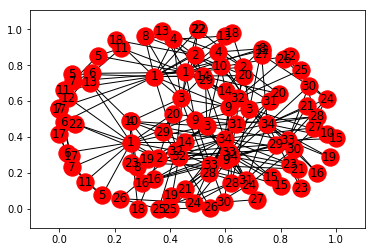

In [9]:
nx.draw_networkx(G)
plt.show()

In [10]:
degCent = nx.degree_centrality(G)
degCent
degCent[34]

0.5151515151515151

- Directed Networks
$$C_{indeg}(v) = \frac{d^{in}_v}{|N|-1}$$
$$C_{outdeg}(v) = \frac{d^{out}_v}{|N|-1}$$

In [ ]:
indegCent=nx.in_degree_centrality(G)
outdegCent=nx.out_degree_centrality(G)

### Closeness Centrality

$$C_{close}(v)=\frac{|N|-1}{\sum_{u\in N\backslash\{v\}}d(v,u)}$$


In [13]:
closeCent = nx.closeness_centrality(G)
closeCent[32]

0.5409836065573771

In [14]:
sum(nx.shortest_path_length(G,32).values())

61

In [16]:
(len(G.nodes())-1)/61

0.5409836065573771

- Discounnected Nodes

<img src="disconnectednodes.png" width="500px"></img>

In [ ]:
closeCent = nx.closeness_centrality(G, normalized=False)
closeCent = nx.closeness_centrality(G, normalized=True)#option2

## Betweenness Centrality

$$ C_{btw}(v)=\sum_{s,t\in N}\frac {\sigma_{s,t}(v)}{\sigma_{s,t}}$$
- $\sigma_{s,t}(v)=$ the number of the shortest paths between nodes s and t that pass through node v  
- $\sigma_{s,t} = $ the number of the shortest paths between nodes s and t

<img src="btwcent.png" width="500px"></img>
<img src="undisbtw.png" width="500px"></img>

### normalization
<img src="normbtw.png" width="500px"></img>

In [17]:
btwnCent = nx.betweenness_centrality(G,normalized= True,endpoints=False)

In [19]:
import operator
sorted(btwnCent.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[(1, 0.4376352813852815),
 (34, 0.30407497594997596),
 (33, 0.14524711399711404),
 (3, 0.14365680615680615),
 (32, 0.13827561327561327)]

In [31]:
sorted(closeCent.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[(1, 0.5689655172413793),
 (3, 0.559322033898305),
 (34, 0.55),
 (32, 0.5409836065573771),
 (9, 0.515625)]

### Approximation

In [20]:
btwnCent_approx = nx.betweenness_centrality(G,normalized = True,endpoints=False,k=10)

In [21]:
sorted(btwnCent_approx.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[(1, 0.44978655603655604),
 (34, 0.33259725228475234),
 (32, 0.16585016835016836),
 (33, 0.15184193121693124),
 (3, 0.14893398268398267)]

### Subsets

In [22]:
btwnCent_subset= nx.betweenness_centrality_subset(G,[34,33,21,30,16,27,15,23,10],[1,4,13,11,6,12,17,7],normalized=True)

In [23]:
sorted(btwnCent_subset.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[(1, 0.04899515993265994),
 (34, 0.028807419432419434),
 (3, 0.018368205868205867),
 (33, 0.01664712602212602),
 (9, 0.014519450456950456)]

### Edges

$$ C_{btw}(e)=\sum_{s,t\in N}\frac{\sigma_{s,t}(e)}{\sigma_{s,t}}$$

In [24]:
btwnCent_edge=nx.edge_betweenness_centrality(G,normalized=True)
sorted(btwnCent_edge.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[((1, 32), 0.12725999490705373),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.07778768072885717),
 ((1, 9), 0.07423959482783016)]

In [26]:
btwnCent_edge_subset= nx.edge_betweenness_centrality_subset(G,[34,33,21,30,16,27,15,23,10],[1,4,13,11,6,12,17,7],normalized=True)
sorted(btwnCent_edge_subset.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[((1, 9), 0.01366536513595337),
 ((1, 32), 0.01366536513595337),
 ((14, 34), 0.012207509266332794),
 ((1, 3), 0.01211343123107829),
 ((1, 6), 0.012032085561497326)]

### summary
- normalization: divide by number of pairs of nodes.  
- approximation: computing betweenness centrality can be computationally expensive. We can approximate computation by taking a subset of nodes.   
- subsets: we can define subsets of source and target nodes to compute betweenness centrality.  
- edge betweenness centrality: we can apply the same framework to find important edges instead of nodes.

## Basic Page Rank

To measure the importance of webpages from the hyperlink network structure.  
PageRank assigns a score of importance to each node. Important nodes are those with many in-links from importance pages.  
It's mainly useful for directed networks.

<table>
<tr><td><img width="500px" src="pagerank1.png"></img></td>
<td><img width="500px" src="pagerank2.png"></img></td>
</tr>
</table>

### summary
- All nodes start with PageRank of 1/n  
- Perform the Basic PageRank Update Rule k times: 
 - Basic PageRank Update Rule: Each node gives an equal share of its current PageRank to all the nodes it links to.  
 - The new PageRank of each node is the sum of all the PageRank it received from other nodes
- For most networks, PageRank values converge as k gets larger

## Scaled Page Rank

Random walk of k steps: start on a random node. Then choose an outgoing edge at random and follow it to the next node. Repeat k times.

**Ramdom walk of k steps with damping parameter $\alpha$:**   
- with probability $\alpha$: choose an outgoing edge at random and follow it to the next node.
- with probability $1-\alpha$: choose a node at random and go to it.

The **Scaled PageRank** of k steps and damping factor $\alpha$ of a node n is the probability that a random walk with damping factor $\alpha$ lands on a n after k steps.

```python
pagerank(G,alpha=0.8)
```

## Hubs and Authorities
**Root**: set of highly relevant web pages - potential authorities.  
**Base**: root nodes and any node that links to a node in root.   
Consider all edges connecting nodes in the base set.

### HITS Algorithm
Computing k iterations of the HITS algorithm to assign an authority score and hub score to each node.  
1. Assign each node an authority and hub score of 1.  
2. Apply the Authority Update Rule: each nodes' authorirt score is thesum of the hub scores of each node that points to it.  
3. Apply the Hub Update Rule: each nodes' hub score is the sum of authority scores of each node that it points to.  
4. Normalize Authority and Hub scores: $auth(j)=\frac{auth(j)}{\sum_{i\in N} auth(i)}$  
5. repeat k times.

<table>
<tr><td><img width="500px" src="hub.png"></img></td>
<td><img width="500px" src="hub2.png"></img></td>
<td><img width="500px" src="hub3.png"></img></td>
</tr>
</table>

```python
hits(G)
```

## Centrality Examples

In [30]:
G1 = nx.Graph()
G1.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('E', 'D'), ('D', 'G'), ('E', 'G'), ('G', 'F')])
nx.betweenness_centrality(G1, normalized = True, endpoints = False)


{'A': 0.03333333333333333,
 'B': 0.07777777777777777,
 'C': 0.18888888888888888,
 'D': 0.38888888888888884,
 'E': 0.1111111111111111,
 'F': 0.0,
 'G': 0.3333333333333333}